In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/1056lab-credit-card-customer-churn-prediction/sampleSubmission.csv
/kaggle/input/1056lab-credit-card-customer-churn-prediction/train.csv
/kaggle/input/1056lab-credit-card-customer-churn-prediction/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/1056lab-credit-card-customer-churn-prediction/train.csv', index_col=0)
train_df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition
Client_ID,,,,,,,,,,,,,,,,,,,,
1,37,F,1,High School,Single,Unknown,Blue,36,3,2,3,6730.0,1093,5637.0,1.010,4814,89,0.854,0.162,0
2,43,M,1,High School,Single,$60K - $80K,Blue,31,5,3,2,2834.0,1720,1114.0,0.620,4581,70,0.591,0.607,0
3,51,F,2,College,Single,Less than $40K,Blue,31,2,1,3,2306.0,1627,679.0,0.507,3776,70,0.944,0.706,0
4,26,M,0,High School,Single,Unknown,Blue,36,5,2,3,3184.0,1421,1763.0,0.712,2253,59,0.439,0.446,0
5,43,M,3,Unknown,Divorced,$80K - $120K,Blue,36,5,2,3,13625.0,0,13625.0,0.930,3902,62,0.632,0.000,0


In [3]:
test_df = pd.read_csv('/kaggle/input/1056lab-credit-card-customer-churn-prediction/test.csv', index_col=0)
test_df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Client_ID,,,,,,,,,,,,,,,,,,,
7090,33,M,3,Graduate,Married,$80K - $120K,Blue,36,5,3,4,2711.0,2073,638.0,0.711,1567,42,0.750,0.765
7091,35,M,2,Uneducated,Married,Less than $40K,Blue,36,4,3,3,3131.0,629,2502.0,0.749,1483,31,0.632,0.201
7092,33,M,2,Uneducated,Single,$40K - $60K,Blue,18,1,1,6,5600.0,2517,3083.0,NaN,2296,46,0.586,0.449
7093,52,M,3,Graduate,Divorced,$120K +,Silver,42,6,2,3,34516.0,1230,33286.0,0.608,2100,38,0.407,0.036
7094,63,F,1,College,Single,$40K - $60K,Blue,56,5,3,2,3071.0,2044,1027.0,0.910,4433,68,0.659,0.666


# Preprocessing

In [4]:
df = pd.concat([train_df.drop(['Attrition'],axis=1), test_df])
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Client_ID,,,,,,,,,,,,,,,,,,,
1,37,F,1,High School,Single,Unknown,Blue,36,3,2,3,6730.0,1093,5637.0,1.010,4814,89,0.854,0.162
2,43,M,1,High School,Single,$60K - $80K,Blue,31,5,3,2,2834.0,1720,1114.0,0.620,4581,70,0.591,0.607
3,51,F,2,College,Single,Less than $40K,Blue,31,2,1,3,2306.0,1627,679.0,0.507,3776,70,0.944,0.706
4,26,M,0,High School,Single,Unknown,Blue,36,5,2,3,3184.0,1421,1763.0,0.712,2253,59,0.439,0.446
5,43,M,3,Unknown,Divorced,$80K - $120K,Blue,36,5,2,3,13625.0,0,13625.0,0.930,3902,62,0.632,0.000


## Missing values imputing

In [5]:
df[df.isnull().any(1)]

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Client_ID,,,,,,,,,,,,,,,,,,,
7092,33,M,2,Uneducated,Single,$40K - $60K,Blue,18,1,1,6,5600.0,2517,3083.0,NaN,2296,46,0.586,0.449


In [6]:
df.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        1
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
median = df['Total_Amt_Chng_Q4_Q1'].median()
df['Total_Amt_Chng_Q4_Q1'] = df['Total_Amt_Chng_Q4_Q1'].fillna(median)

In [8]:
df.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
train_df.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition'],
      dtype='object')

In [10]:
import plotly.express as px
yprop = 'Customer_Age'
xprop = 'Months_Inactive_12_mon'
h= 'Attrition'
px.scatter(train_df, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

In [11]:
yprop = 'Months_on_book'
xprop = 'Dependent_count'
h= 'Attrition'
px.scatter(train_df, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

In [12]:
fig = px.box(train_df, x='Gender',y='Avg_Utilization_Ratio', color='Attrition', notched=True)
fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

In [13]:
yprop = 'Total_Amt_Chng_Q4_Q1'
xprop = 'Total_Trans_Amt'
h= 'Attrition'
px.scatter(train_df, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 1 to 10127
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [15]:
data = pd.DataFrame(df, columns = ['Customer_Age', 'Gender', 'Dependent_count','Education_Level', 'Marital_Status', 
                                     'Income_Category', 'Card_Category',
                                     'Months_on_book',
                                     'Total_Relationship_Count', 
                                     'Months_Inactive_12_mon','Contacts_Count_12_mon',
                                     'Credit_Limit',
                                     'Total_Revolving_Bal',
                                     'Avg_Open_To_Buy',
                                     'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                                     'Total_Trans_Ct',
                                     'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
                                     ])

In [16]:
import copy
df_train=copy.deepcopy(data)
cols=np.array(data.columns[data.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
df_train.drop(columns=cols,inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform 
df_train= df_train.apply(lambda x: d[x.name].fit_transform(x))
df_train[cols] = data[cols]

In [18]:
df_train.head(2)

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Client_ID,,,,,,,,,,,,,,,,,,,
1,0,3,2,5,0,37,1,36,3,2,3,6730.0,1093,5637.0,1.01,4814,89,0.854,0.162
2,1,3,2,2,0,43,1,31,5,3,2,2834.0,1720,1114.0,0.62,4581,70,0.591,0.607


In [19]:
df_train.columns

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

## Standardizing

In [20]:
numeric_columns = ['Customer_Age', 'Dependent_count', 
                   'Months_on_book',
                   'Total_Relationship_Count', 
                   'Months_Inactive_12_mon','Contacts_Count_12_mon',
                   'Credit_Limit', 'Total_Revolving_Bal',
                   'Avg_Open_To_Buy',
                   'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                   'Total_Trans_Ct', 
                   'Total_Ct_Chng_Q4_Q1',
                   'Avg_Utilization_Ratio']

for col in numeric_columns:
    df[col] = (df[col] - df[col].mean()) / df[col].std()
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Client_ID,,,,,,,,,,,,,,,,,,,
1,-1.163300,F,-1.036411,High School,Single,Unknown,Blue,0.008964,-0.522759,-0.337581,0.492379,-0.209264,-0.085663,-0.201540,1.140717,0.120665,1.028490,0.595489,-0.409492
2,-0.414873,M,-1.036411,High School,Single,$60K - $80K,Blue,-0.617099,0.763905,0.651908,-0.411596,-0.637925,0.683674,-0.699083,-0.638456,0.052077,0.219035,-0.509154,1.204631
3,0.583030,F,-0.266534,College,Single,Less than $40K,Blue,-0.617099,-1.166090,-1.327071,0.492379,-0.696018,0.569562,-0.746934,-1.153960,-0.184887,0.219035,0.973503,1.563728
4,-2.535416,M,-1.806289,High School,Single,Unknown,Blue,0.008964,0.763905,-0.337581,0.492379,-0.599416,0.316797,-0.627691,-0.218753,-0.633207,-0.249597,-1.147578,0.620645
5,-0.414873,M,0.503343,Unknown,Divorced,$80K - $120K,Blue,0.008964,0.763905,-0.337581,0.492379,0.549364,-1.426788,0.677161,0.775759,-0.147797,-0.121789,-0.336947,-0.997106


## Dummy variables

In [21]:
df_train.count()

Gender                      10127
Education_Level             10127
Marital_Status              10127
Income_Category             10127
Card_Category               10127
Customer_Age                10127
Dependent_count             10127
Months_on_book              10127
Total_Relationship_Count    10127
Months_Inactive_12_mon      10127
Contacts_Count_12_mon       10127
Credit_Limit                10127
Total_Revolving_Bal         10127
Avg_Open_To_Buy             10127
Total_Amt_Chng_Q4_Q1        10127
Total_Trans_Amt             10127
Total_Trans_Ct              10127
Total_Ct_Chng_Q4_Q1         10127
Avg_Utilization_Ratio       10127
dtype: int64

In [22]:
df_train.columns

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [23]:
#categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
#df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
#df.head()

## Rebuilding train data and test data

In [24]:
nrow, ncol = train_df.shape
train_df = pd.concat([df_train[:nrow],train_df['Attrition']], axis=1)
train_df.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition
Client_ID,,,,,,,,,,,,,,,,,,,,
1,0,3,2,5,0,37,1,36,3,2,3,6730.0,1093,5637.0,1.010,4814,89,0.854,0.162,0
2,1,3,2,2,0,43,1,31,5,3,2,2834.0,1720,1114.0,0.620,4581,70,0.591,0.607,0
3,0,0,2,4,0,51,2,31,2,1,3,2306.0,1627,679.0,0.507,3776,70,0.944,0.706,0
4,1,3,2,5,0,26,0,36,5,2,3,3184.0,1421,1763.0,0.712,2253,59,0.439,0.446,0
5,1,6,0,3,0,43,3,36,5,2,3,13625.0,0,13625.0,0.930,3902,62,0.632,0.000,0


In [25]:
train_df.count()

Gender                      7089
Education_Level             7089
Marital_Status              7089
Income_Category             7089
Card_Category               7089
Customer_Age                7089
Dependent_count             7089
Months_on_book              7089
Total_Relationship_Count    7089
Months_Inactive_12_mon      7089
Contacts_Count_12_mon       7089
Credit_Limit                7089
Total_Revolving_Bal         7089
Avg_Open_To_Buy             7089
Total_Amt_Chng_Q4_Q1        7089
Total_Trans_Amt             7089
Total_Trans_Ct              7089
Total_Ct_Chng_Q4_Q1         7089
Avg_Utilization_Ratio       7089
Attrition                   7089
dtype: int64

In [26]:
test_df = df_train[nrow:]
test_df.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Client_ID,,,,,,,,,,,,,,,,,,,
7090,1,2,1,3,0,33,3,36,5,3,4,2711.0,2073,638.0,0.7110,1567,42,0.750,0.765
7091,1,5,1,4,0,35,2,36,4,3,3,3131.0,629,2502.0,0.7490,1483,31,0.632,0.201
7092,1,5,2,1,0,33,2,18,1,1,6,5600.0,2517,3083.0,0.7365,2296,46,0.586,0.449
7093,1,2,0,0,3,52,3,42,6,2,3,34516.0,1230,33286.0,0.6080,2100,38,0.407,0.036
7094,0,0,2,1,0,63,1,56,5,3,2,3071.0,2044,1027.0,0.9100,4433,68,0.659,0.666


In [27]:
test_df.count()

Gender                      3038
Education_Level             3038
Marital_Status              3038
Income_Category             3038
Card_Category               3038
Customer_Age                3038
Dependent_count             3038
Months_on_book              3038
Total_Relationship_Count    3038
Months_Inactive_12_mon      3038
Contacts_Count_12_mon       3038
Credit_Limit                3038
Total_Revolving_Bal         3038
Avg_Open_To_Buy             3038
Total_Amt_Chng_Q4_Q1        3038
Total_Trans_Amt             3038
Total_Trans_Ct              3038
Total_Ct_Chng_Q4_Q1         3038
Avg_Utilization_Ratio       3038
dtype: int64

# Visualizing

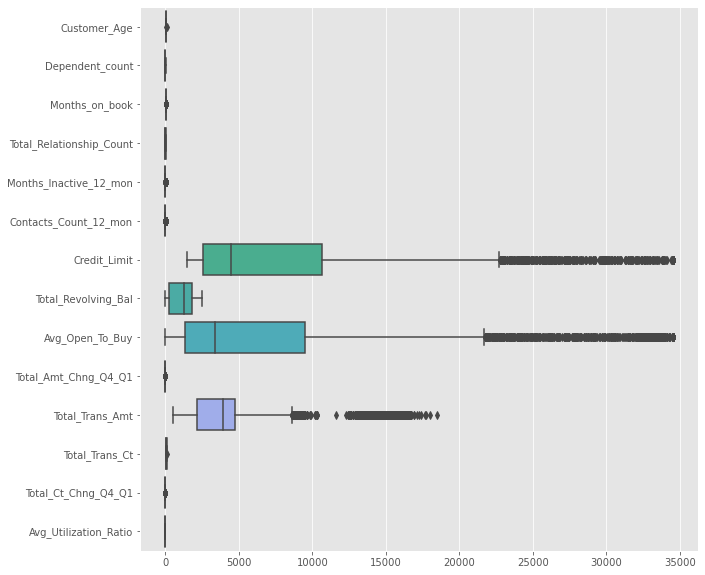

In [28]:
from mlxtend.preprocessing import standardize
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 10))
sns.boxplot(data=train_df[numeric_columns], orient='h')
plt.show()

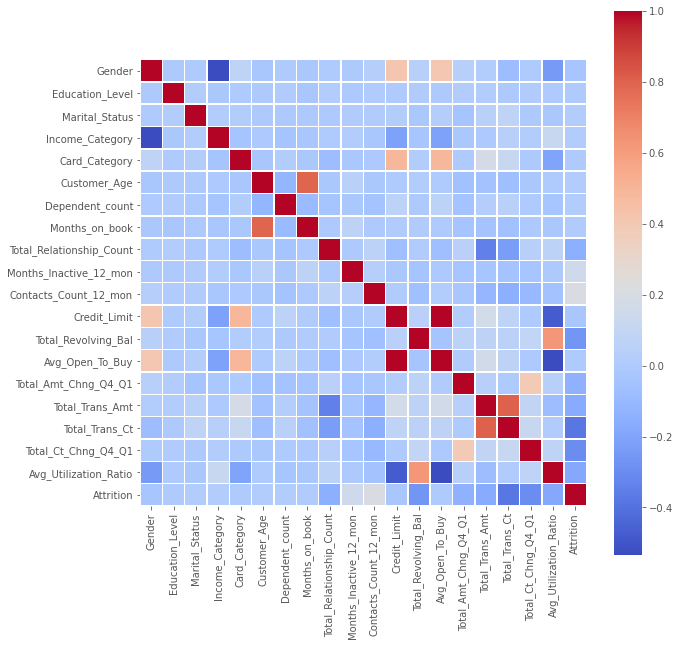

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt

corr = train_df.corr()

plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 10))
g = sns.heatmap(corr, cmap='coolwarm', square=True, linecolor='w', linewidth=.5)
plt.show()

# Logistic Regression

In [30]:
from collections import Counter
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from numpy import where
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier

from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.ensemble.forest import ExtraTreesRegressor

from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.



# EXtra

In [31]:
from sklearn.linear_model import LogisticRegression

X = train_df.drop(['Attrition'], axis=1).to_numpy()
y = train_df['Attrition'].to_numpy()

model = ExtraTreesRegressor(n_estimators=305)
model.fit(X,y)

ExtraTreesRegressor(n_estimators=305)

In [32]:
model.score(X,y)

1.0

In [33]:
test_X = test_df.to_numpy()
p = model.predict(test_X)
submit_df = pd.read_csv('/kaggle/input/1056lab-credit-card-customer-churn-prediction/sampleSubmission.csv', index_col=0)
submit_df['Attrition'] = p
submit_df.head()

,Attrition
Client_ID,
7090,0.042623
7091,0.081967
7092,0.790164
7093,0.455738
7094,0.003279


In [34]:
submit_df.to_csv('submission_extra.csv')

In [35]:
# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score
from optuna import create_study

In [36]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
def objective(trial):
    n_estimators = int(trial.suggest_loguniform('n_estimators', 100, 800))
    max_depth = int(trial.suggest_loguniform('max_depth',1, 300))
    min_samples_split =int(trial.suggest_loguniform('min_samples_split', 1, 64))
    #min_samples_leaf=int(trial.suggest_loguniform('min_samples_leaf', 1, 64))
    model = ExtraTreesRegressor(n_estimators=n_estimators, 
                          max_depth=max_depth,
                          #min_samples_leaf= min_samples_leaf,
                          min_samples_split=min_samples_split,
                          )
    X_train_, _, y_train_, _ = train_test_split(X, y, train_size=0.8, random_state=42)  # fast but inaccurate tuning
    scores = cross_validate(model, X_train_, y_train_, scoring='roc_auc', cv=kf)
    return scores['test_score'].mean()

study = create_study(direction='maximize')
study.optimize(objective, n_trials=5)
best_trial =  study.best_trial
print('AUC: {}'.format(best_trial.value))
print('Best params: {}'.format(best_trial.params))

[I 2021-01-25 01:05:40,044] A new study created in memory with name: no-name-e650d3cd-b4f4-4451-a082-21e63388bb1b
[I 2021-01-25 01:05:48,061] Trial 0 finished with value: 0.9868391003929571 and parameters: {'n_estimators': 203.49288678022646, 'max_depth': 181.09426120865123, 'min_samples_split': 12.124609603896925}. Best is trial 0 with value: 0.9868391003929571.
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__


AUC: 0.9875040440528918
Best params: {'n_estimators': 590.8007420014643, 'max_depth': 56.52069653113656, 'min_samples_split': 2.9972241120261884}


# LGM

In [37]:

model1 =LGBMRegressor()
model1.fit(X,y)

LGBMRegressor()

In [38]:
model1.score(X,y)

0.9236969709783058

In [39]:
test_X = test_df.to_numpy()
p = model1.predict(test_X)
submit_df1 = pd.read_csv('/kaggle/input/1056lab-credit-card-customer-churn-prediction/sampleSubmission.csv', index_col=0)
submit_df1['Attrition'] =  p
submit_df1.head()

,Attrition
Client_ID,
7090,-0.020607
7091,0.020141
7092,1.086558
7093,0.731933
7094,-0.000048


In [40]:
submit_df1.to_csv('submission_XGB.csv')

# GradientBoostingRegressor

In [41]:
model2 =GradientBoostingRegressor()
model2.fit(X,y)

GradientBoostingRegressor()

In [42]:
model2.score(X,y)

0.7885206445208526

In [43]:
test_X = test_df.to_numpy()
p = model2.predict(test_X)
submit_df2 = pd.read_csv('/kaggle/input/1056lab-credit-card-customer-churn-prediction/sampleSubmission.csv', index_col=0)
submit_df2['Attrition'] = p
submit_df2.head()

,Attrition
Client_ID,
7090,-0.060985
7091,0.085599
7092,0.951639
7093,0.612577
7094,0.006542


In [44]:
submit_df2.to_csv('submission_GradientBoosting.csv')

# XBG

In [45]:
model3 =XGBRegressor()
model3.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
model3.score(X,y)

0.9858563840231728

In [47]:
test_X = test_df.to_numpy()
p = model3.predict(test_X)
submit_df3 = pd.read_csv('/kaggle/input/1056lab-credit-card-customer-churn-prediction/sampleSubmission.csv', index_col=0)
submit_df3['Attrition'] =  p
submit_df3.head()

,Attrition
Client_ID,
7090,0.002655
7091,0.066551
7092,0.841682
7093,0.553626
7094,0.016945


In [48]:
submit_df3.to_csv('submission_XBG.csv')

In [49]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
def objective(trial):
    n_estimators = int(trial.suggest_loguniform('n_estimators', 100, 5000))
    max_depth = int(trial.suggest_loguniform('max_depth', 300, 1000))
    min_child_weight = int(trial.suggest_loguniform('min_child_weight', 1, 128))
    
    model = XGBRegressor( learning_rate =0.01, 
                         n_estimators=n_estimators,
                          max_depth=max_depth,
                          min_child_weight=min_child_weight,
                          nthread=-1,
                          seed=0,
                          objective= 'binary:logistic',
                          subsample=0.9,
                          random_state=42,
                          colsample_bytree=0.8)
    X_train_, _, y_train_, _ = train_test_split(X, y, train_size=0.95, random_state=42)  # fast but inaccurate tuning
    scores = cross_validate(model, X_train_, y_train_, scoring='roc_auc', cv=kf)
    return scores['test_score'].mean()

study = create_study(direction='maximize')
study.optimize(objective, n_trials=10)
best_trial =  study.best_trial
print('AUC: {}'.format(best_trial.value))
print('Best params: {}'.format(best_trial.params))

[I 2021-01-25 01:06:26,620] A new study created in memory with name: no-name-55edbd30-8155-460b-a94e-21e8296044d7
[I 2021-01-25 01:06:54,639] Trial 0 finished with value: 0.9727479569123234 and parameters: {'n_estimators': 1271.3544750717813, 'max_depth': 417.6808429793992, 'min_child_weight': 70.98184075018472}. Best is trial 0 with value: 0.9727479569123234.
[I 2021-01-25 01:09:45,797] Trial 1 finished with value: 0.9918724065977449 and parameters: {'n_estimators': 3463.769131649351, 'max_depth': 451.99545247381275, 'min_child_weight': 1.7101280149020262}. Best is trial 1 with value: 0.9918724065977449.
[I 2021-01-25 01:09:50,091] Trial 2 finished with value: 0.9392913697942582 and parameters: {'n_estimators': 172.8279181333045, 'max_depth': 420.99159764940305, 'min_child_weight': 103.6662882027669}. Best is trial 1 with value: 0.9918724065977449.
[I 2021-01-25 01:12:08,290] Trial 3 finished with value: 0.9919016822550166 and parameters: {'n_estimators': 2576.5354738720303, 'max_dept

AUC: 0.9919016822550166
Best params: {'n_estimators': 2576.5354738720303, 'max_depth': 746.7678189194128, 'min_child_weight': 1.843739558282792}


In [50]:
n_estimators = int(best_trial.params['n_estimators'])
max_depth = int(best_trial.params['max_depth'])
min_child_weight = int(best_trial.params['min_child_weight'])

In [51]:
model4=XGBRegressor( learning_rate =0.01, 
                         n_estimators=n_estimators,
                          max_depth=max_depth,
                          min_child_weight=min_child_weight,
                          nthread=-1,
                           seed=0,
                          objective= 'binary:logistic',
                          subsample=0.9,
                          random_state=42,
                          colsample_bytree=0.8)
model4.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=746,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2576, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             objective='binary:logistic', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
test_X = test_df.to_numpy()
p = model4.predict(test_X)
submit_df4 = pd.read_csv('/kaggle/input/1056lab-credit-card-customer-churn-prediction/sampleSubmission.csv', index_col=0)
submit_df4['Attrition'] =  p
submit_df4.head()

,Attrition
Client_ID,
7090,0.000059
7091,0.000538
7092,0.960078
7093,0.934444
7094,0.000079


In [53]:
submit_df4.to_csv('submission_XBG_tuning.csv')

In [54]:
df.shape

(10127, 19)

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['class'] = le.fit_transform(train_df['Attrition'])
train_df = train_df.drop('Attrition', axis=1)

In [56]:
categorical_columns = train_df.select_dtypes(exclude=['int64','float64']).columns
numerical_columns = train_df.drop('class', axis=1).select_dtypes(include=['int64','float64']).columns
categorical_columns

Index([], dtype='object')

In [57]:
train_df.shape

(7089, 20)

In [58]:
train_df

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,class
Client_ID,,,,,,,,,,,,,,,,,,,,
1,0,3,2,5,0,37,1,36,3,2,3,6730.0,1093,5637.0,1.010,4814,89,0.854,0.162,0
2,1,3,2,2,0,43,1,31,5,3,2,2834.0,1720,1114.0,0.620,4581,70,0.591,0.607,0
3,0,0,2,4,0,51,2,31,2,1,3,2306.0,1627,679.0,0.507,3776,70,0.944,0.706,0
4,1,3,2,5,0,26,0,36,5,2,3,3184.0,1421,1763.0,0.712,2253,59,0.439,0.446,0
5,1,6,0,3,0,43,3,36,5,2,3,13625.0,0,13625.0,0.930,3902,62,0.632,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7085,1,2,1,2,0,46,4,36,3,3,3,3258.0,0,3258.0,0.784,3169,67,0.489,0.000,0
7086,1,5,2,3,0,39,3,36,4,2,1,12618.0,1585,11033.0,0.586,4768,82,0.864,0.126,0
7087,0,4,2,4,0,36,3,23,6,2,1,2410.0,1705,705.0,0.798,2505,69,0.568,0.707,0


In [59]:
# Generate x and y sets
x = train_df.drop('class', axis=1).values
y = train_df['class']

# Over-Sampling | SMOTE

In [60]:
# Importing packages for SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler

from imblearn.pipeline import Pipeline

from collections import Counter

In [61]:
sm = SMOTE(sampling_strategy='auto', random_state=1234)
x_sm, y_sm = sm.fit_resample(X, y)

In [62]:
print(Counter(y))
print(Counter(y_sm))

Counter({0: 5940, 1: 1149})
Counter({0: 5940, 1: 5940})


In [63]:
over = BorderlineSMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.6)

steps = [('o', over), ('u', under)]

In [64]:
pipeline = Pipeline(steps=steps)

# transform the dataset
x_sm_us, y_sm_us = pipeline.fit_resample(X, y)

print(Counter(y))
print(Counter(y_sm_us))

Counter({0: 5940, 1: 1149})
Counter({0: 2970, 1: 1782})


In [65]:
list(Counter(y).keys())

[0, 1]

# Generate new DataFrame with SMOTE and UnderSampling data

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1234)

In [67]:
feature_names = list(train_df.drop('class', axis=1).columns)

In [68]:
sm_us_x = np.concatenate((x_sm_us, x_test))
sm_us_y = np.concatenate((y_sm_us, y_test))

In [69]:
sm_us_x.shape

(6170, 19)

In [70]:
sm_us_df = pd.DataFrame(np.column_stack([sm_us_y, sm_us_x]), columns=['class'] + feature_names)
sm_us_df.head()

,class,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.0,1.0,5.0,1.0,2.0,0.0,36.0,2.0,21.0,4.0,1.0,5.0,12763.0,2517.0,10246.0,1.631,2599.0,46.0,0.917,0.197
1,0.0,1.0,6.0,2.0,3.0,0.0,49.0,1.0,36.0,6.0,3.0,4.0,34516.0,0.0,34516.0,0.665,2512.0,45.0,0.324,0.000
2,0.0,1.0,3.0,3.0,1.0,0.0,42.0,2.0,37.0,6.0,2.0,3.0,2993.0,2249.0,744.0,0.863,4106.0,81.0,0.528,0.751
3,0.0,0.0,4.0,2.0,4.0,0.0,30.0,0.0,18.0,6.0,3.0,2.0,2132.0,797.0,1335.0,0.779,3265.0,74.0,0.574,0.374
4,0.0,1.0,5.0,1.0,0.0,2.0,44.0,2.0,36.0,2.0,1.0,3.0,34516.0,1421.0,33095.0,0.744,14465.0,114.0,0.754,0.041


In [71]:
sm_us_df.shape

(6170, 20)

In [72]:
y_sm_us.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [73]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
def objective(trial):
    n_estimators = int(trial.suggest_loguniform('n_estimators', 100, 5000))
    max_depth = int(trial.suggest_loguniform('max_depth', 300, 1000))
    min_child_weight = int(trial.suggest_loguniform('min_child_weight', 1, 128))
    
    model = XGBRegressor( learning_rate =0.01, 
                         n_estimators=n_estimators,
                          max_depth=max_depth,
                          min_child_weight=min_child_weight,
                          nthread=-1,
                           seed=0,
                          objective= 'binary:logistic',
                          subsample=0.9,
                          random_state=1234,
                          colsample_bytree=0.8)
    X_train_, _, y_train_, _ = train_test_split(x_sm_us, y_sm_us, train_size=0.9, random_state=42)  # fast but inaccurate tuning
    scores = cross_validate(model, X_train_, y_train_, scoring='roc_auc', cv=kf)
    return scores['test_score'].mean()

study = create_study(direction='maximize')
study.optimize(objective, n_trials=10)
best_trial =  study.best_trial
print('AUC: {}'.format(best_trial.value))
print('Best params: {}'.format(best_trial.params))

[I 2021-01-25 01:16:51,241] A new study created in memory with name: no-name-14c43356-2468-47f6-a011-f734e60f2892
[I 2021-01-25 01:17:55,993] Trial 0 finished with value: 0.9912947525416088 and parameters: {'n_estimators': 3467.283654900712, 'max_depth': 303.07684569844287, 'min_child_weight': 19.183001133623424}. Best is trial 0 with value: 0.9912947525416088.
[I 2021-01-25 01:19:14,699] Trial 1 finished with value: 0.9937335330449871 and parameters: {'n_estimators': 2601.451161707266, 'max_depth': 890.2407559856684, 'min_child_weight': 3.1911862691222486}. Best is trial 1 with value: 0.9937335330449871.
[I 2021-01-25 01:20:48,722] Trial 2 finished with value: 0.9938541263868494 and parameters: {'n_estimators': 3106.421293200414, 'max_depth': 996.9584872293541, 'min_child_weight': 2.386361400269736}. Best is trial 2 with value: 0.9938541263868494.
[I 2021-01-25 01:22:39,499] Trial 3 finished with value: 0.9936875935115713 and parameters: {'n_estimators': 4272.18279118237, 'max_depth':

AUC: 0.9940430073663371
Best params: {'n_estimators': 3983.123363652837, 'max_depth': 724.1140808129918, 'min_child_weight': 1.073504593815924}


In [74]:
n_estimators = int(best_trial.params['n_estimators'])
max_depth = int(best_trial.params['max_depth'])
min_child_weight = int(best_trial.params['min_child_weight'])

In [75]:
model4=XGBRegressor( learning_rate =0.01, 
                         n_estimators=n_estimators,
                          max_depth=max_depth,
                          min_child_weight=min_child_weight,
                          nthread=-1,
                           seed=0,
                          objective= 'binary:logistic',
                          subsample=0.9,
                          random_state=1234,
                          colsample_bytree=0.8)
model4.fit(x_sm_us, y_sm_us)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=724,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3983, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             objective='binary:logistic', random_state=1234, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
test_X = test_df.to_numpy()
p2 = model4.predict(test_X)
submit_df4 = pd.read_csv('/kaggle/input/1056lab-credit-card-customer-churn-prediction/sampleSubmission.csv', index_col=0)
submit_df4['Attrition'] =  p2
submit_df4.head()

,Attrition
Client_ID,
7090,0.000083
7091,0.001936
7092,0.975998
7093,0.979840
7094,0.000058


In [77]:
submit_df4.to_csv('submission_XBG_tuning_SMOTE.csv')

In [78]:
model_SMOTE1=XGBRegressor( learning_rate =0.01, 
                         n_estimators=n_estimators,
                          max_depth=max_depth,
                          min_child_weight=min_child_weight,
                          nthread=-1,
                           seed=0,
                          objective= 'binary:logistic',
                          subsample=0.9,
                          random_state=42,
                          colsample_bytree=0.8)
model_SMOTE1.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=724,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3983, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             objective='binary:logistic', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
test_X = test_df.to_numpy()
p2_model_SMOTE1 = model_SMOTE1.predict(test_X)
submit_df5 = pd.read_csv('/kaggle/input/1056lab-credit-card-customer-churn-prediction/sampleSubmission.csv', index_col=0)
submit_df5['Attrition'] =  p2_model_SMOTE1
submit_df5.head()

,Attrition
Client_ID,
7090,0.000021
7091,0.000271
7092,0.969622
7093,0.963624
7094,0.000043


In [80]:
submit_df5.to_csv('submission_XBG_tuning_SMOTE2.csv')

In [81]:
from catboost import CatBoostRegressor
model_cat = CatBoostRegressor(iterations=10000)
model_cat.fit(X,y)

Learning rate set to 0.009612
0:	learn: 0.3667553	total: 56.2ms	remaining: 9m 21s
1:	learn: 0.3650000	total: 59.7ms	remaining: 4m 58s
2:	learn: 0.3631976	total: 64.9ms	remaining: 3m 36s
3:	learn: 0.3615852	total: 69ms	remaining: 2m 52s
4:	learn: 0.3599648	total: 72.5ms	remaining: 2m 24s
5:	learn: 0.3583785	total: 76.3ms	remaining: 2m 7s
6:	learn: 0.3567664	total: 80.6ms	remaining: 1m 55s
7:	learn: 0.3551588	total: 83.8ms	remaining: 1m 44s
8:	learn: 0.3534758	total: 88.7ms	remaining: 1m 38s
9:	learn: 0.3519652	total: 93.4ms	remaining: 1m 33s
10:	learn: 0.3503391	total: 98.5ms	remaining: 1m 29s
11:	learn: 0.3488257	total: 103ms	remaining: 1m 25s
12:	learn: 0.3471903	total: 106ms	remaining: 1m 21s
13:	learn: 0.3456340	total: 110ms	remaining: 1m 18s
14:	learn: 0.3441296	total: 114ms	remaining: 1m 15s
15:	learn: 0.3426494	total: 119ms	remaining: 1m 14s
16:	learn: 0.3412357	total: 123ms	remaining: 1m 12s
17:	learn: 0.3397417	total: 128ms	remaining: 1m 10s
18:	learn: 0.3382601	total: 132ms	re

In [82]:
model.score(X,y)

1.0

In [83]:
test_X = test_df.to_numpy()
p_cat = model_cat.predict(test_X)

submit_df6 = pd.read_csv('/kaggle/input/1056lab-credit-card-customer-churn-prediction/sampleSubmission.csv', index_col=0)
submit_df6['Attrition'] =  p_cat
submit_df6.head()

,Attrition
Client_ID,
7090,-0.061095
7091,0.157694
7092,0.923812
7093,0.592094
7094,-0.014987


In [84]:
submit_df5.to_csv('submission_cat_tuning_SMOTE2.csv')